In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('census_income2.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [7]:
df.duplicated().sum()

24

In [8]:
df.drop_duplicates(keep = 'first')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df['marital-status']

0             Never-married
1        Married-civ-spouse
2                  Divorced
3        Married-civ-spouse
4        Married-civ-spouse
                ...        
32556    Married-civ-spouse
32557    Married-civ-spouse
32558               Widowed
32559         Never-married
32560    Married-civ-spouse
Name: marital-status, Length: 32561, dtype: object

In [10]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [11]:
count_unique_occupations = df['occupation'].nunique()
count_unique_occupations

15

In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [13]:
df['occupation'] = df['occupation'].replace('?', np.nan)

In [14]:
# Assuming you have a DataFrame named 'df'
count_question_marks = (df == '?').sum().sum()

count_question_marks


2419

In [15]:
total_missing_values = df.isna().sum().sum()
total_missing_values

1843

In [16]:
2419 + 1843

4262

In [17]:
df.replace('?', np.nan, inplace=True)

In [18]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [19]:
df.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [21]:
count_unique_occupations = df['occupation'].nunique()
count_unique_occupations

14

<AxesSubplot: xlabel='count', ylabel='annual_income'>

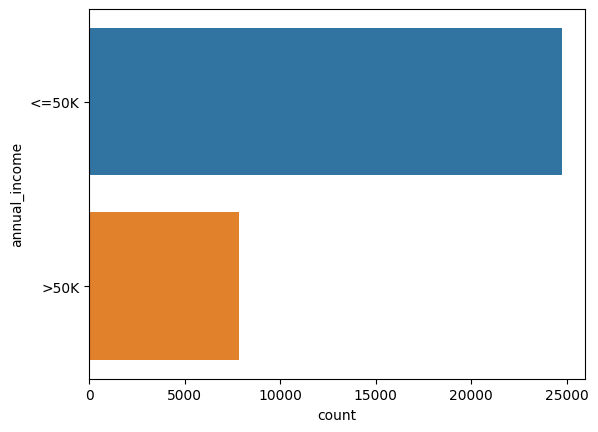

In [22]:
sns.countplot(data=df, y= 'annual_income')

### Changing columns name from annual_income to Annual Income

In [23]:
#df=df.rename(columns={'annual_income':'Annual Income'})

In [24]:
#df

### Applying LabelEncoder

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col])

In [27]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [28]:
value_counts = np.bincount(df['annual_income'])
count_0 = value_counts[0]
count_1 = value_counts[1]

print(count_0,count_1)

24720 7841


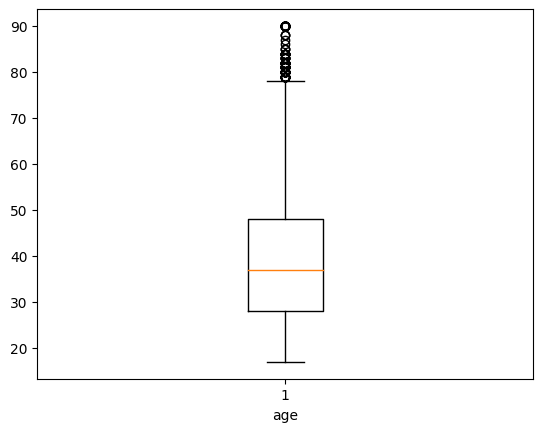

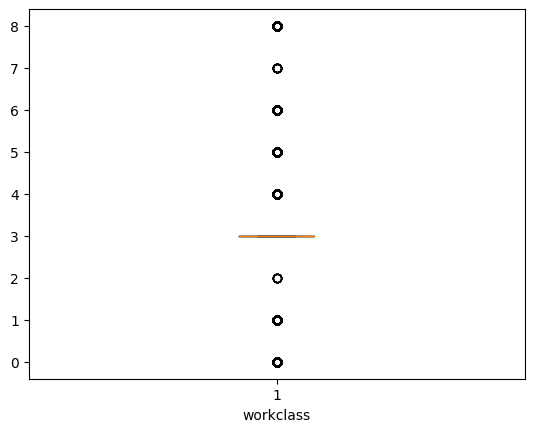

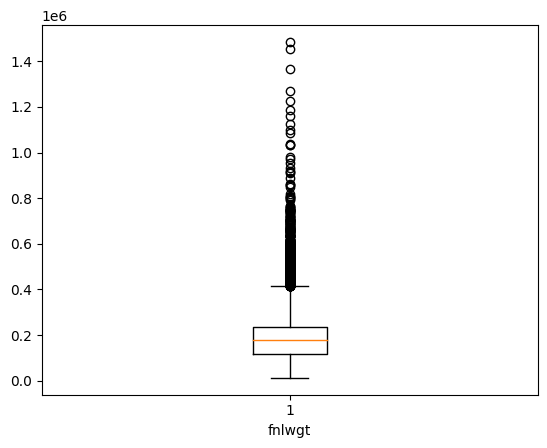

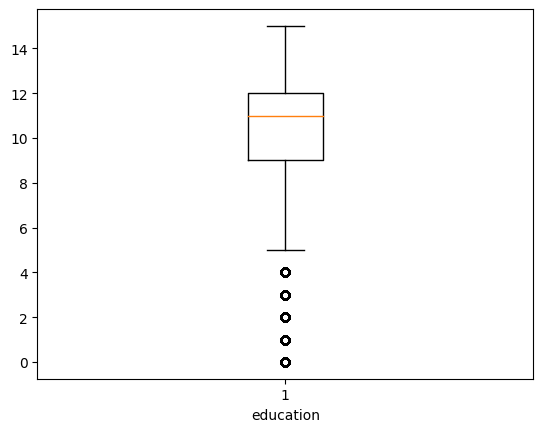

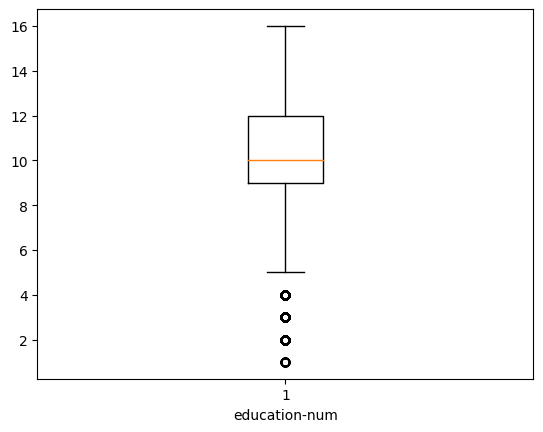

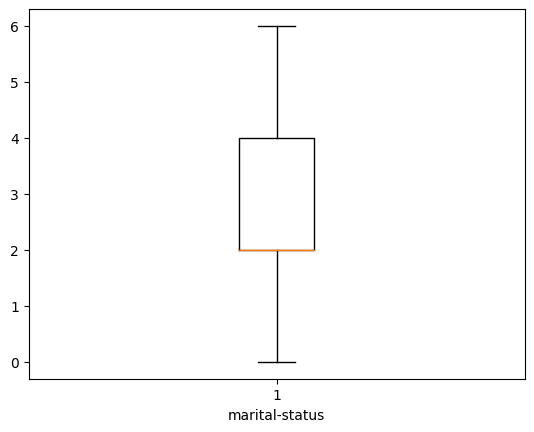

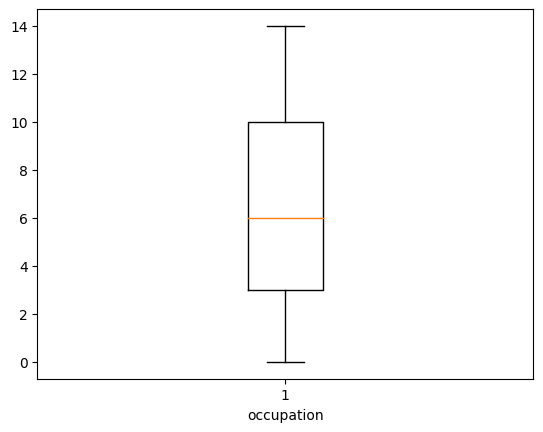

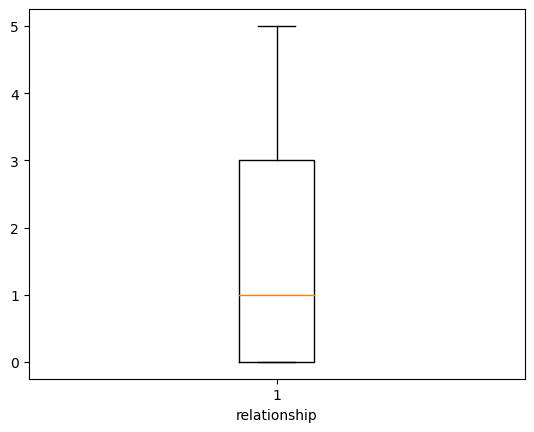

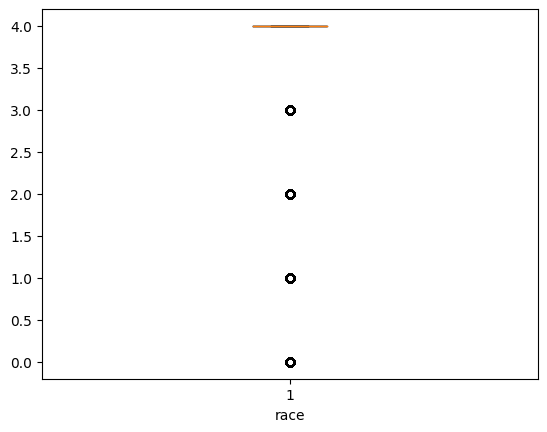

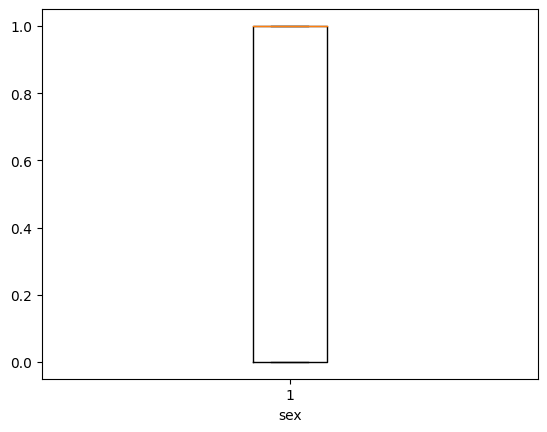

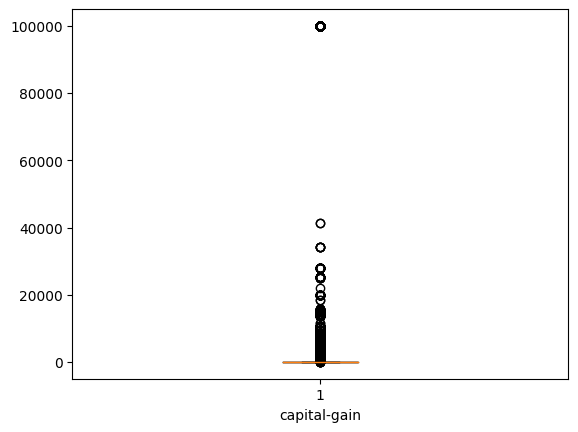

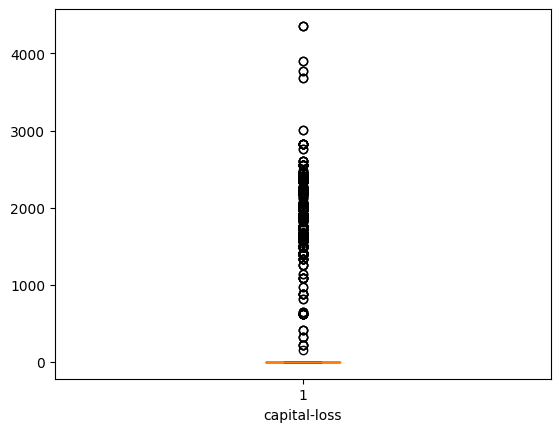

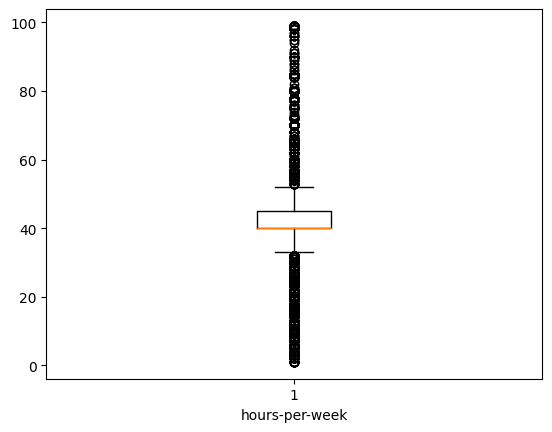

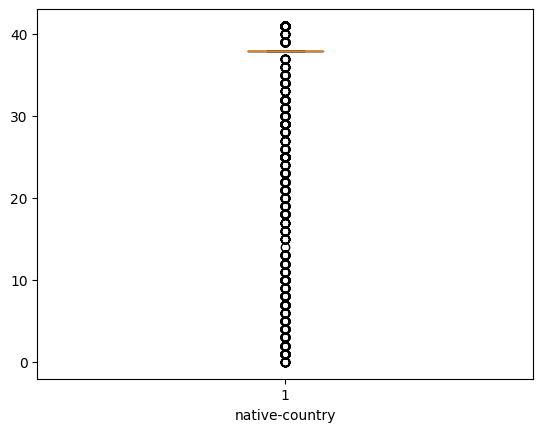

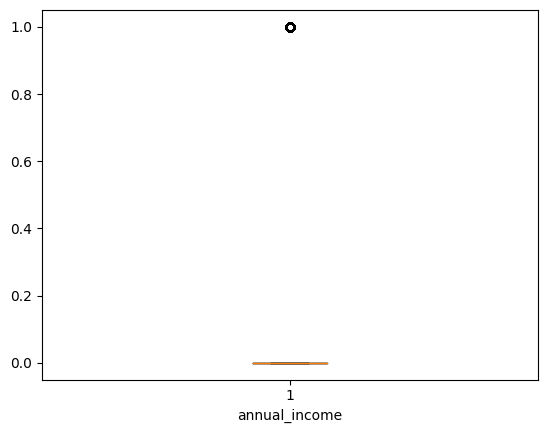

In [29]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [30]:
#out_cols = ['age','workclass','fnlwgt','education','education-num', 'race','hours-per-week','native-country','Annual Income']

In [31]:
#for i in out_cols:
#    Q1=df[i].quantile(0.25)
#    Q3=df[i].quantile(0.75)
#    IQR=Q3-Q1
#    UW=Q3+1.5*IQR
#    LW=Q1-1.5*IQR
#    df=df[(df[i]>=LW) & (df[i]<=UW)]

In [32]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


### Getting correlation matrix

<AxesSubplot: >

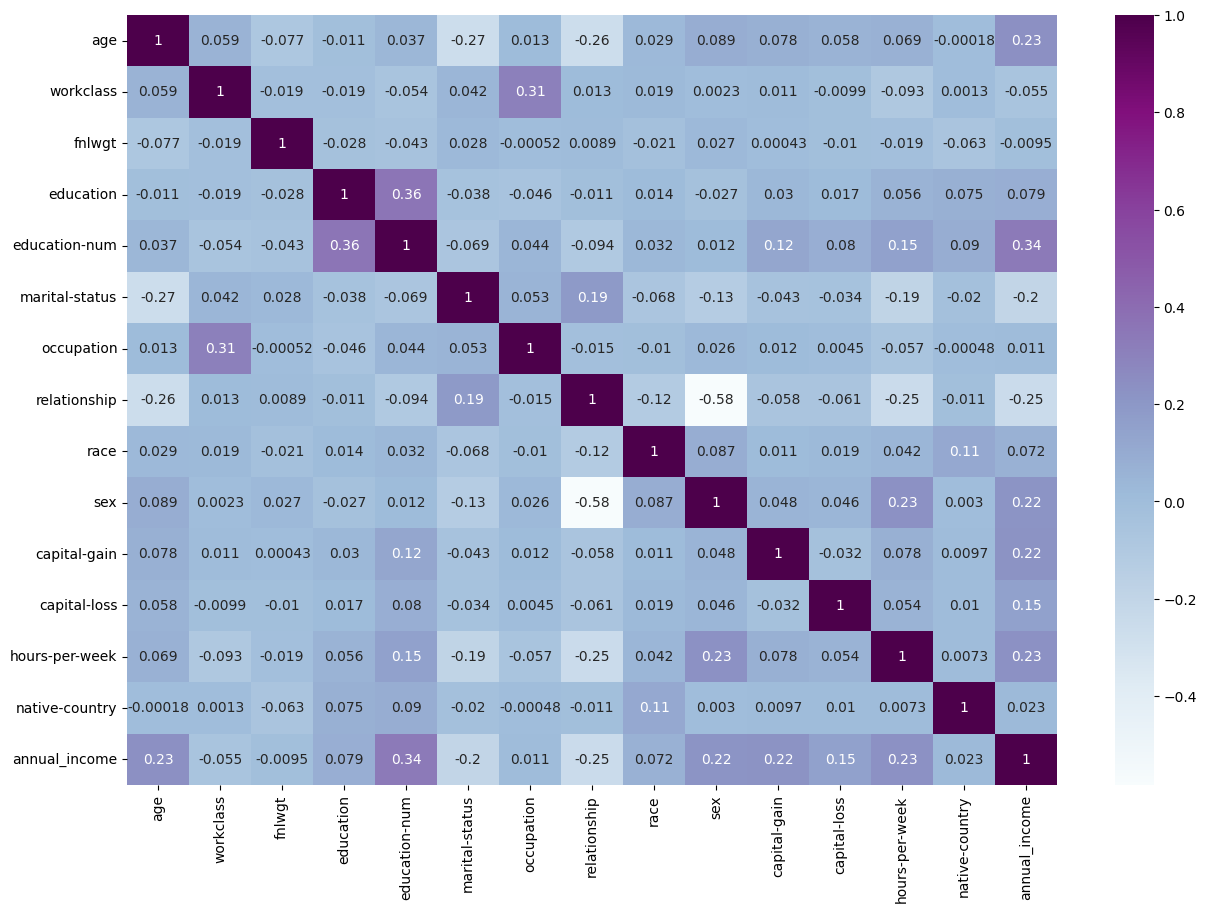

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot= True,cmap='BuPu')

### Applying VIF factor

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
cols=[]
for col in df.columns:
    if(col!='Annual Income'): 
        cols.append(col)

In [35]:
cols

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'annual_income']

In [36]:
x = df[cols]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,age,9.059424
1,workclass,6.119261
2,fnlwgt,4.040702
3,education,9.256945
4,education-num,19.973045
5,marital-status,4.173175
6,occupation,3.578415
7,relationship,2.706418
8,race,17.684090
9,sex,4.493450


In [37]:
x.drop(['native-country'], axis = 1 , inplace =True )

In [38]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,age,8.553684
1,workclass,6.064544
2,fnlwgt,4.018663
3,education,9.132081
4,education-num,18.786857
5,marital-status,4.065963
6,occupation,3.572370
7,relationship,2.588833
8,race,15.517361
9,sex,4.403585


In [39]:
x.drop(['education-num'], axis = 1 , inplace =True )

In [40]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,age,8.386213
1,workclass,6.062643
2,fnlwgt,4.004481
3,education,7.342811
4,marital-status,3.986247
5,occupation,3.519477
6,relationship,2.561883
7,race,14.779399
8,sex,4.402446
9,capital-gain,1.081707


In [41]:
x.drop(['race'], axis = 1 , inplace =True )

In [42]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,age,7.683603
1,workclass,5.937870
2,fnlwgt,3.937123
3,education,7.005899
4,marital-status,3.866558
5,occupation,3.509709
6,relationship,2.488178
7,sex,4.251862
8,capital-gain,1.081060
9,capital-loss,1.077763


In [43]:
x.drop(['hours-per-week'], axis = 1 , inplace =True )

In [44]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,age,6.905491
1,workclass,5.916604
2,fnlwgt,3.849351
3,education,6.395082
4,marital-status,3.834021
5,occupation,3.504382
6,relationship,2.442686
7,sex,3.835108
8,capital-gain,1.080805
9,capital-loss,1.077230


In [45]:
x.drop(['workclass'], axis = 1 , inplace =True )

In [46]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,age,6.378590
1,fnlwgt,3.836021
2,education,6.293909
3,marital-status,3.768568
4,occupation,3.067017
5,relationship,2.396565
6,sex,3.768585
7,capital-gain,1.080608
8,capital-loss,1.077230
9,annual_income,1.599834


In [47]:
x.drop(['education'], axis = 1 , inplace =True )

In [48]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,age,5.415829
1,fnlwgt,3.748938
2,marital-status,3.616861
3,occupation,3.051127
4,relationship,2.256412
5,sex,3.609081
6,capital-gain,1.080586
7,capital-loss,1.077016
8,annual_income,1.586983


### Removing ouliers applying VIF

In [49]:
out_cols = ['age','fnlwgt','marital-status','occupation','relationship','sex','capital-gain','capital-loss','annual_income']

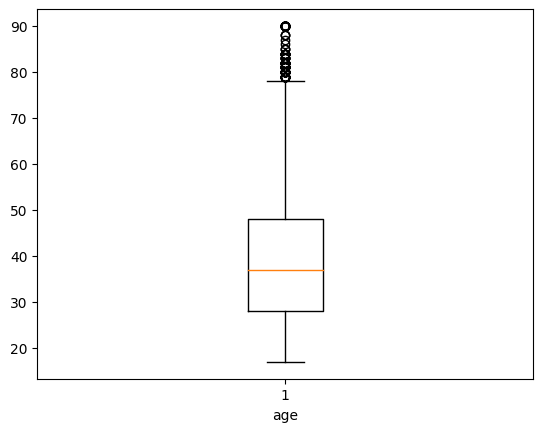

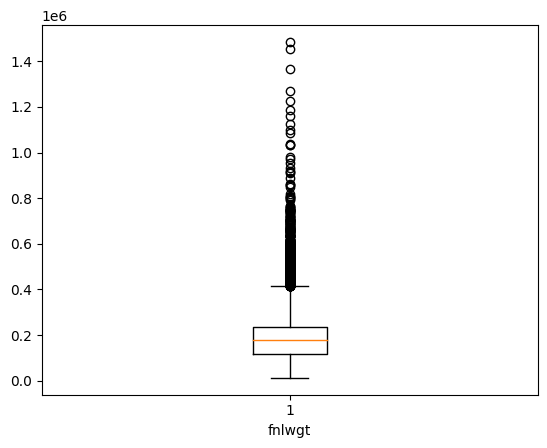

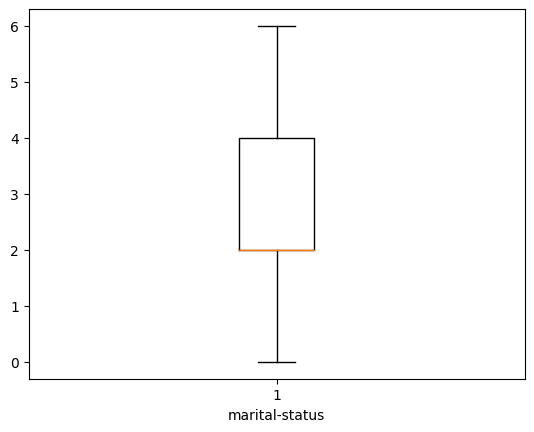

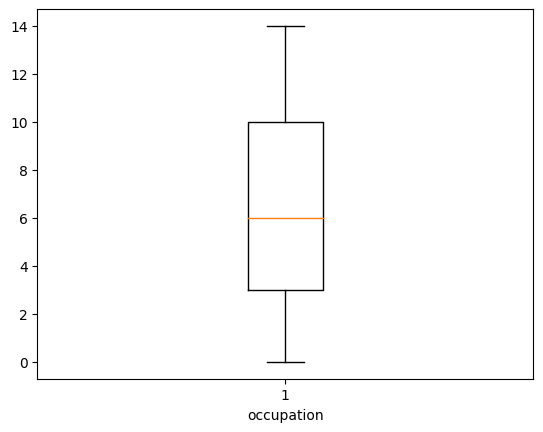

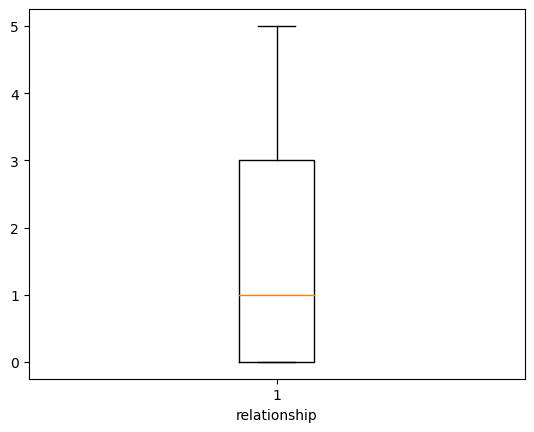

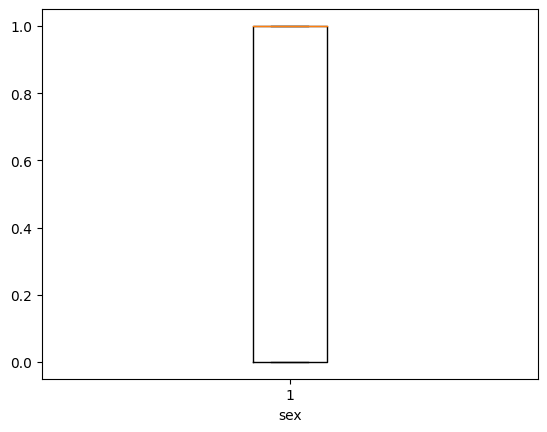

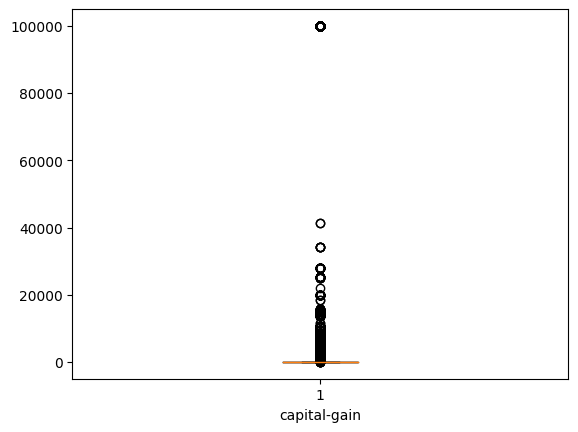

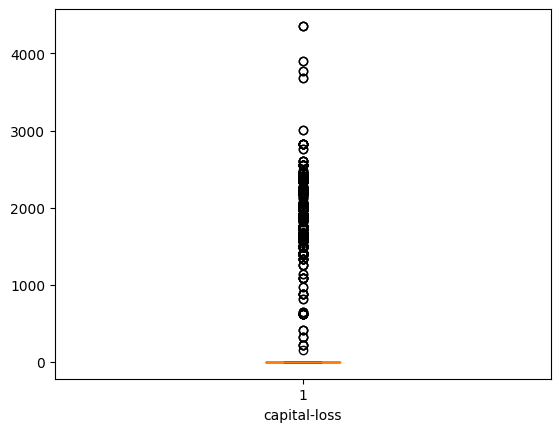

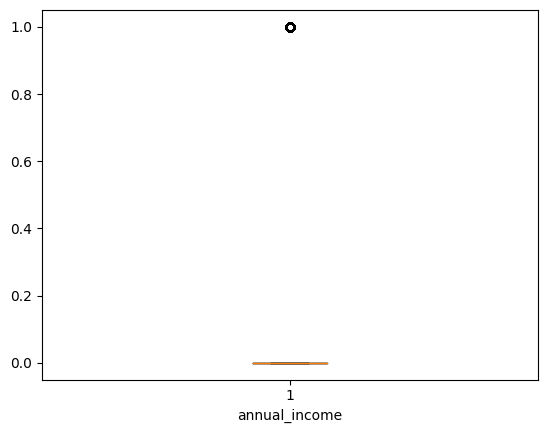

In [50]:
for col in out_cols:
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [51]:
#for i in out_cols:
#   Q1=df[i].quantile(0.25)
#   Q3=df[i].quantile(0.75)
#   IQR=Q3-Q1
#   UW=Q3+1.5*IQR
#   LW=Q1-1.5*IQR
#   df=df[(df[i]>=LW) & (df[i]<=UW)]

In [52]:
x = df[['age','fnlwgt','education','marital-status','occupation','relationship','sex','capital-gain','capital-loss']]
#x = df[['age','fnlwgt','marital-status','occupation','relationship','sex','capital-gain','capital-loss']]
y = df['annual_income']

In [53]:
x

,age,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss
0,39,77516,9,4,0,1,1,2174,0
1,50,83311,9,2,3,0,1,0,0
2,38,215646,11,0,5,1,1,0,0
3,53,234721,1,2,5,0,1,0,0
4,28,338409,9,2,9,5,0,0,0
...,...,...,...,...,...,...,...,...,...
32556,27,257302,7,2,12,5,0,0,0
32557,40,154374,11,2,6,0,1,0,0
32558,58,151910,11,6,0,4,0,0,0
32559,22,201490,11,4,0,3,1,0,0


In [54]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: annual_income, Length: 32561, dtype: int32

### Applying RandomForest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=2000)

In [57]:
x_train

,age,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss
4010,22,400966,15,4,0,3,0,0,0
20594,18,216730,1,4,7,3,1,0,0
18199,31,62374,11,2,9,0,1,0,0
28749,50,99894,4,4,12,1,0,0,0
6425,44,298885,11,2,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1590,65,207281,15,2,10,0,1,0,0
4045,29,57423,8,2,6,0,1,0,0
29902,64,267198,14,2,14,0,1,0,0
4936,46,340718,1,6,0,1,0,0,0


In [58]:
y_train

4010     0
20594    0
18199    0
28749    0
6425     0
        ..
1590     0
4045     0
29902    0
4936     0
27574    0
Name: annual_income, Length: 22792, dtype: int32

In [59]:
x_test

,age,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss
8782,21,494638,7,4,14,3,1,0,0
17152,19,35245,11,4,13,3,1,0,0
24962,22,229456,15,4,0,3,0,0,0
24301,48,39530,11,0,0,1,0,0,0
28682,47,144351,11,0,2,4,1,0,625
...,...,...,...,...,...,...,...,...,...
6747,21,176690,15,4,7,3,1,0,0
29929,44,107218,9,2,3,0,1,0,0
8763,26,247025,15,4,5,1,1,0,0
5581,44,169397,11,2,2,0,1,0,0


In [60]:
y_test

8782     0
17152    0
24962    0
24301    0
28682    0
        ..
6747     0
29929    0
8763     0
5581     1
12826    0
Name: annual_income, Length: 9769, dtype: int32

In [61]:
rf_model=RandomForestClassifier(n_estimators = 20, random_state = 2000)

In [62]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=2000)

In [63]:
rf_pred = rf_model.predict(x_test)

In [64]:
rf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
value_counts = np.bincount(rf_pred)
count_0 = value_counts[0]
count_1 = value_counts[1]

print(count_0,count_1)

7791 1978


### Model accuracy and classification report 

In [66]:
accuracy_score(rf_pred,y_test)

0.8396970007165524

In [67]:
confusion_matrix(rf_pred,y_test)

array([[6814,  977],
       [ 589, 1389]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      7791
           1       0.59      0.70      0.64      1978

    accuracy                           0.84      9769
   macro avg       0.75      0.79      0.77      9769
weighted avg       0.85      0.84      0.84      9769



# Applying RandomSearchCV 

### Hyperparameter Tuning

In [69]:
RF = RandomForestClassifier() #call the RF model

In [70]:
### parameters
parameters = {'max_depth':np.arange(1,10),
               'min_samples_split': np.arange(2,5), 
               'random_state':[3], 
               'n_estimators': np.arange(20,30)}

In [71]:
parameters

{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_split': array([2, 3, 4]),
 'random_state': [3],
 'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [73]:
### Define search
search = RandomizedSearchCV(RF, parameters, scoring='accuracy')

In [74]:
### Execute the search
result = search.fit(x_train, y_train)

In [75]:
result.best_score_

0.8578010350568206

In [76]:
best_params = result.best_params_
best_params

{'random_state': 3, 'n_estimators': 25, 'min_samples_split': 2, 'max_depth': 9}

In [77]:
rf1 = RandomForestClassifier(**best_params)
rf1.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=25, random_state=3)

In [78]:
y_pred = rf1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
value_counts = np.bincount(rf_pred)
count_0 = value_counts[0]
count_1 = value_counts[1]

print(count_0,count_1)

7791 1978


In [79]:
accuracy_score(y_test, y_pred)

0.852492578564848

In [80]:
confusion_matrix(y_pred,y_test)

array([[7072, 1110],
       [ 331, 1256]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      8182
           1       0.53      0.79      0.64      1587

    accuracy                           0.85      9769
   macro avg       0.74      0.83      0.77      9769
weighted avg       0.89      0.85      0.86      9769



## Applying Logistic Regression 

In [82]:
x = df[['age','fnlwgt','education','marital-status','occupation','relationship','sex','capital-gain','capital-loss']]
#x = df[['age','fnlwgt','marital-status','occupation','relationship','sex','capital-gain','capital-loss']]
y = df[['annual_income']]


In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=2000)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error

In [85]:
lo_model=LogisticRegression()


In [86]:
lo_model

LogisticRegression()

In [87]:
lo_model.fit(x_train,y_train)

C:\Users\Shreyas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [88]:
lo_pred=lo_model.predict(x_test)

In [89]:
lo_pred

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
value_counts = np.bincount(lo_pred)
count_0 = value_counts[0]
count_1 = value_counts[1]

print(count_0,count_1)

8934 835


In [91]:
y_test

,annual_income
8782,0
17152,0
24962,0
24301,0
28682,0
...,...
6747,0
29929,0
8763,0
5581,1


In [92]:
y2 = y_test.value_counts()
y2

annual_income
0                7403
1                2366
dtype: int64

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [94]:
accuracy_score(lo_pred,y_test)

0.7947589313133381

In [95]:
confusion_matrix(lo_pred,y_test)

array([[7166, 1768],
       [ 237,  598]], dtype=int64)

In [96]:
from sklearn.metrics import classification_report
print(classification_report(lo_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8934
           1       0.25      0.72      0.37       835

    accuracy                           0.79      9769
   macro avg       0.61      0.76      0.63      9769
weighted avg       0.91      0.79      0.83      9769



## CONCLUSIONS

#1. The aim of census project is to find out factors responsible for annual income less than or equal to and more than 50,000.
The data is mostly categorical in nature.

#2. In the dataset, '?' mark has been replaced by NaN, and then all NaN values have been removed.

#3. A correlation matrix shows high multicollinearity as values are small w.r.t annual income column. 

#4. Outliers have been checked by using a boxplot. These outliers have not been removed depiberately due to categoral nature of the data. 

#5. LabelEncoder was used to convert from categorical into numerical data.

#6. Variance Inflation Factor (VIF) is used to get rid of multicollinearity. After applying VIF, the columns having VIF values around 5-6 have been chosen for further data analysis. 

Thus, the independent variables or features are as follows:

1   age	            6.378590
2	fnlwgt	        3.836021
3	education	    6.293909
4	marital-status	3.768568
5	occupation	    3.067017
6	relationship	2.396565
7	sex	            3.768585
8	capital-gain	1.080608
9	capital-loss	1.077230

The dependent variable is 'annual_income: 1.599834 (VIF value).

#7. The data is studied with help of Random Forest classifer and Logistic regression classifier. While using Random Forest classifier, a hyperparameter tuning method using Randomized SearchCV is used to optimise model and its accuracy.

#8. The accuarcy of Random Forest classifier with and without using RandomizedSearchCV - as a hyperparameter tuning - is around 84-85%, while by using Logistic regression is around 80%.  

#9. The true positive values obtained by using above models indicate that the features or parameters, as mentioned in point #5, are responsible for annual income less than or equal to 50,000. 

#10. With respect using VIF as in #5, the analysis has been performed by removing 'education' column too, but it hardly affects accuracy of the model. The education factor, although considered, may not be important in determining income level of less than or equal to 50,000.

#11. The following are the values of sensitivity, specificity obtained by Random Forest Classifier.

Sensitivity = TP/(TP + FN) = 7072/(7072+1110) = 0.86

Specificity = TN/(TN + FP) = 1256/(1256+331) = 0.79

False Positive - FP - The model predicts that 331 datapoint where the features mention in #5 are responsbile for the annual income <=50,000 while in reality they DO NOT matter in the analysis.

False Negative - FN - The model predicts that 1110 datapoint where the features mention in #5 are NOT responsbile for the annual income <=50,000 while in reality DO matter in the analysis.
 
